In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from utils.generate_phrases import generate_random_phrase, generate_random_phrase_with_mutation, alphabet

In [3]:
def num_char_certo(y_true:str, y_pred:str):
    count = 0
    for i, letter in enumerate(y_true):
        if letter == y_pred[i]:
            count += 1
    
    count = count / len(y_true)
    return count

In [4]:
def generate_phrases(phrase, u=0.1, n_phrases=5, gen_max=1e7):
    for letter in phrase:
        if letter not in alphabet:
            raise ValueError(f"Letter {letter} not in alphabet")
    
    phrase_size = len(phrase)
    gen = 0
    initial_phrases = [generate_random_phrase(phrase_size, alphabet) for i in range(n_phrases)]
    new_phrases = initial_phrases
    reached = False
    while True:
        if phrase in new_phrases:
            reached = True
        
        if phrase in new_phrases or gen >= gen_max:
            break

        best_phrase = new_phrases[0]
        score = num_char_certo(phrase, best_phrase)
        for i in range(1, n_phrases):
            if num_char_certo(phrase, new_phrases[i]) > score:
                best_phrase = new_phrases[i]
                score = num_char_certo(phrase, best_phrase)
        
        new_phrases = [generate_random_phrase_with_mutation(best_phrase, alphabet=alphabet, u=u) for i in range(n_phrases)]
        gen += 1
    
    return initial_phrases, {"gen": gen, "reached": reached}, new_phrases

In [5]:
def plot_graphs_and_describe(full_gens, u_list):
    d = {}

    for i in range(len(full_gens)):
        d[f"U{u_list[i]}"] = full_gens[i]

    df = pd.DataFrame(d)

    print(df.describe())

    df.boxplot()
    plt.xticks(rotation=45)
    plt.show()

def run_exp(u_list, phrase, qntd_exp):
    print("Generating phrases for different mutation rates: \n", u_list)
    med_gens = []
    full_gens = []
    t1 = time.time()
    for u in u_list:
        gens = []
        t1_epoch = time.time()
        for i in range(qntd_exp):
            initial_phrase, gen, new_phrases = generate_phrases(phrase, u, gen_max=1e7)
            gens.append(gen.get("gen"))
            if not gen.get("reached"):
                print(f"This experiment {i} did not reach the phrase")
        t2_epoch = time.time()
        print(f"Mutation rate: {u:.2f} | Mean generations: {round(np.mean(gens), 2):,} | Time taken: {t2_epoch-t1_epoch:.2f}s")

        med_gens.append(np.mean(gens))
        full_gens.append(gens)
    t2 = time.time()
    print("Mean generations: ", med_gens)
    print("Time taken: ", t2-t1)

    plt.plot(u_list, med_gens)
    plt.plot(u_list, med_gens, '*')
    plt.ylabel("Mean generations")
    plt.xlabel("Mutation rate")
    plt.show()

    plot_graphs_and_describe(full_gens, u_list)

Took 75 generations to generate the phrase 'GAGCCC' from '['GTACTC', 'TCCCGT', 'CCGTCA', 'CTCCCT', 'GGTCTA', 'GGCCCA', 'AACAAT', 'GGCCTC', 'CTACGT', 'TGCATG']'
Took 434 generations to generate the phrase 'GAGCCC' from '['ACCTGA', 'CCGTGG', 'GCTGTA', 'ATACCC', 'TCAACT', 'AGAACA', 'CGTGTC', 'CTGTTT', 'TGTACC', 'AGCTTG']'
Took 347 generations to generate the phrase 'GAGCCC' from '['AGCACG', 'GATAAG', 'CCTACG', 'AAGTCA', 'GAAAGA', 'ATGTGA', 'AGATAA', 'CTACCC', 'ACCCAC', 'CCAGGC']'
Took 956 generations to generate the phrase 'GAGCCC' from '['CCGACG', 'TTTGAG', 'TGTTGG', 'TTCGAT', 'GCAATT', 'AGTTAC', 'AGATTG', 'AATTCA', 'TCCCCA', 'GGTAGC']'
Took 365 generations to generate the phrase 'GAGCCC' from '['CAAGCT', 'AATGCA', 'GCAACA', 'CATGTT', 'CGTGTA', 'TAGGAG', 'GCCGGC', 'TCGGGA', 'ATCATA', 'GGGATC']'
Took 317 generations to generate the phrase 'GAGCCC' from '['CCCCGG', 'AGAAGG', 'TCGATG', 'CATCTG', 'CTACGC', 'TGCGTA', 'TACCGT', 'AGTTCG', 'CCCCAA', 'ATCATT']'
Took 250 generations to generate th

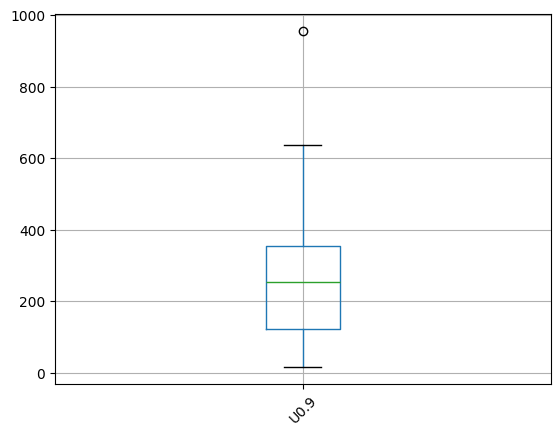

In [7]:
phrase = 'GAGCCC'
n_phrases = 10
u = 0.9
n_exp = 30

gens = []
for i in range(n_exp):
    initial_phrases, gen, new_phrases = generate_phrases(phrase, u=u, n_phrases=n_phrases)
    gen = gen.get("gen")
    gens.append(gen)

    print(f"Took {gen:,} generations to generate the phrase '{phrase}' from '{initial_phrases}'")
    # print("\n Mutated to '{new_phrases}'")

mean_gen = sum(gens) / len(gens)
print(f"Mean generations: {mean_gen:,}")

plot_graphs_and_describe([gens], [u])

Generating phrases for different mutation rates: 
 [0.001, 0.101, 0.201, 0.30100000000000005, 0.401, 0.501, 0.6010000000000001, 0.7010000000000001, 0.801, 0.901]
Mutation rate: 0.00 | Mean generations: 1,662.47 | Time taken: 0.35s
Mutation rate: 0.10 | Mean generations: 22.37 | Time taken: 0.01s
Mutation rate: 0.20 | Mean generations: 15.2 | Time taken: 0.00s
Mutation rate: 0.30 | Mean generations: 27.07 | Time taken: 0.01s
Mutation rate: 0.40 | Mean generations: 26.9 | Time taken: 0.01s
Mutation rate: 0.50 | Mean generations: 49.8 | Time taken: 0.02s
Mutation rate: 0.60 | Mean generations: 106.23 | Time taken: 0.04s
Mutation rate: 0.70 | Mean generations: 186.63 | Time taken: 0.07s
Mutation rate: 0.80 | Mean generations: 208.87 | Time taken: 0.09s
Mutation rate: 0.90 | Mean generations: 458.1 | Time taken: 0.23s
Mean generations:  [1662.4666666666667, 22.366666666666667, 15.2, 27.066666666666666, 26.9, 49.8, 106.23333333333333, 186.63333333333333, 208.86666666666667, 458.1]
Time taken

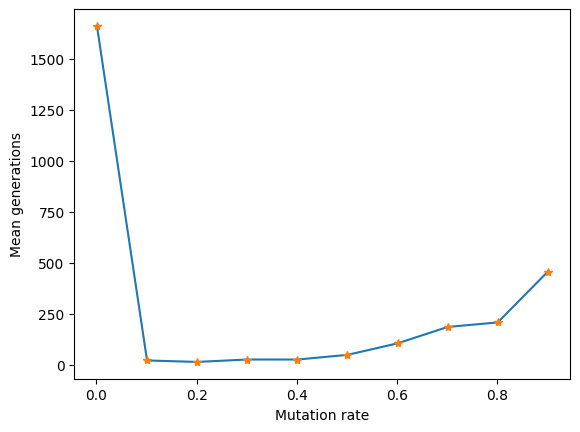

            U0.001     U0.101     U0.201  U0.30100000000000005     U0.401  \
count    30.000000  30.000000  30.000000             30.000000  30.000000   
mean   1662.466667  22.366667  15.200000             27.066667  26.900000   
std    1046.227764   9.282848   8.876159             19.328259  22.103752   
min       0.000000   6.000000   3.000000              5.000000   4.000000   
25%     964.250000  16.250000   9.000000             13.000000  13.000000   
50%    1722.000000  21.500000  12.000000             22.000000  18.500000   
75%    2188.000000  28.500000  19.750000             33.250000  36.750000   
max    4460.000000  48.000000  37.000000             78.000000  87.000000   

         U0.501  U0.6010000000000001  U0.7010000000000001      U0.801  \
count   30.0000            30.000000            30.000000   30.000000   
mean    49.8000           106.233333           186.633333  208.866667   
std     49.6848            76.568961           220.102560  173.164608   
min      6.000

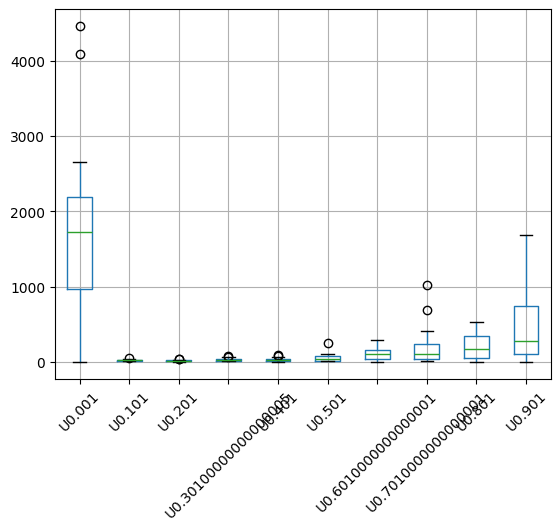

In [ ]:
# Variar valor de u

phrase = 'GAGCCC'#TCAATCAGGCATACC'
qntd_exp = 30
step = 0.1
u_list = list(np.arange(0.001, 1, step))

run_exp(u_list, phrase, qntd_exp)

Generating phrases for different mutation rates: 
 [0.1, 0.11, 0.12, 0.13, 0.13999999999999999, 0.14999999999999997, 0.15999999999999998, 0.16999999999999998, 0.17999999999999997, 0.18999999999999995, 0.19999999999999996, 0.20999999999999996, 0.21999999999999995, 0.22999999999999995, 0.23999999999999994, 0.24999999999999992, 0.2599999999999999, 0.2699999999999999, 0.2799999999999999, 0.2899999999999999, 0.29999999999999993, 0.30999999999999994, 0.3199999999999999, 0.32999999999999985, 0.33999999999999986, 0.34999999999999987, 0.3599999999999999, 0.3699999999999999, 0.3799999999999999, 0.3899999999999999, 0.3999999999999998, 0.4099999999999998, 0.4199999999999998, 0.4299999999999998, 0.43999999999999984, 0.44999999999999984, 0.45999999999999985, 0.46999999999999986, 0.47999999999999976, 0.48999999999999977]
Mutation rate: 0.10 | Mean generations: 21.1 | Time taken: 0.01s
Mutation rate: 0.11 | Mean generations: 19.6 | Time taken: 0.01s
Mutation rate: 0.12 | Mean generations: 17.2 | Time 

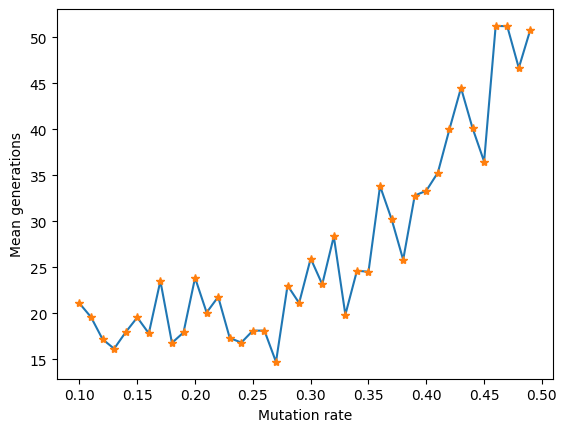

            U0.1      U0.11      U0.12      U0.13  U0.13999999999999999  \
count  30.000000  30.000000  30.000000  30.000000             30.000000   
mean   21.100000  19.600000  17.200000  16.166667             17.966667   
std    10.697567  13.034702   9.440923   8.313194             15.860346   
min     8.000000   5.000000   3.000000   2.000000              3.000000   
25%    14.000000   9.500000  11.000000  10.000000             13.000000   
50%    17.500000  13.500000  16.000000  14.000000             15.000000   
75%    24.750000  28.750000  22.750000  22.250000             19.750000   
max    55.000000  52.000000  40.000000  34.000000             96.000000   

       U0.14999999999999997  U0.15999999999999998  U0.16999999999999998  \
count             30.000000             30.000000             30.000000   
mean              19.566667             17.833333             23.533333   
std               12.859140             11.682830             15.440058   
min                1.000

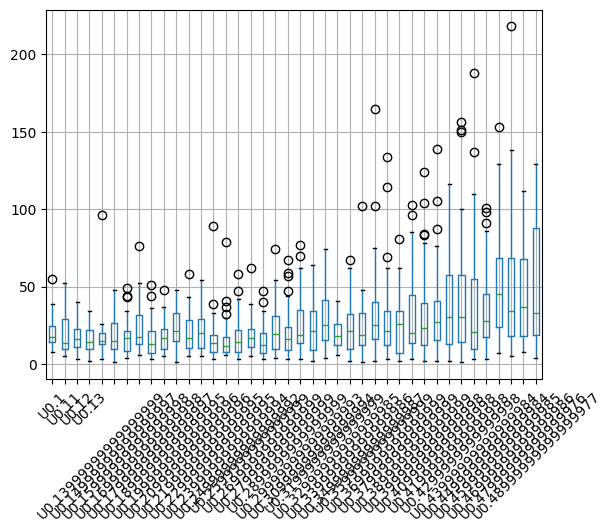

In [12]:
# Variar valor de u

phrase = 'GAGCCC'#TCAATCAGGCATACC'
qntd_exp = 30
step = 0.01
u_list = list(np.arange(0.1, 0.5, step))

run_exp(u_list, phrase, qntd_exp)